In [2]:
import numpy as np

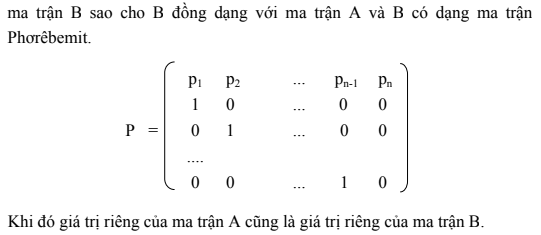

In [28]:
B = np.array([[1,2,3,4],
             [2,1,2,3],
             [3,2,1,2],
             [0,3,0,1]])

In [75]:
# Test cho trường hợp cuối cùng
test_all = np.array([[2,1,0,0,0,0],
                     [1,3,1,0,0,0],
                     [0,1,2,0,0,0],
                     [0,0,0,8.7,-12.36,1.629],
                     [0,0,0,1,0,0],
                     [0,0,0,0,1,0]])


In [6]:
test = np.array([[6.1,1.0,5.1],
                 [1.0,0.5,6.1],
                 [5.1,6.1,7.2]])

In [7]:
test2 = np.array([[5.1,1.1,1.0],
                 [1.1,6.1,1.1],
                 [1.0,1.1,5.1]])

# Eigenvalues

In [76]:
def create_change_matrix(n,j, k):
    """
    Tạo ma trận C để A = C.A.C-1 sẽ đổi hàng k,j; cột k,j
    """
    C = np.eye(n)  
    C[:, [k, j]] = C[:, [j, k]]
    return C

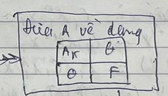

In [2]:
def solve_TH4B(A,k):
    '''
    A2: Ak
    F: Ma trận Frobenius
    D: ma trận góc trên bên phải, chứa các cột khác 0, cần đưa về 0
    
    Thuật toán sẽ False khi không thể đưa cột cuối cùng về 0, tức là không thể đưa D về ma trận 0
    '''
    A2 = A[:k,:k]
    F = A[k:,k:]
    D = A[:k,k:]
    zero = A[k:,:k]
    print(f'A tách:\n {A2}\nF:\n{F}')
    for col in range(D.shape[1]-1):
        S1 = np.eye(A2.shape[0])
        S4 = np.eye(F.shape[0])
        S2 = np.zeros_like(D)
        S2[:, col+1] = -D[:, col]
        S2_inv = np.zeros_like(D)
        S2_inv[:, col+1] = D[:, col]

        S = np.block([[S1, S2], [zero, S4]])
        S_inv = np.block([[S1, S2_inv], [zero, S4]])
                
        A = S@A@S_inv
        if np.all(A[:, -1] != 0):
            print('False')
            break
    return A[:k,:k],F

In [80]:
def Danielevski(A):
    print(f'A:\n{A}\n---------------------------------------')
    n = np.shape(A)[0]
    list_M = []
    list_other_value = np.array([])
    i = n-1
    while i>0:
        M = np.eye(n)
        M_inverse = np.eye(n)
        
        M[i-1,:] = A[i,:]
        list_M.append(M)
        print(f'M{n-i}:\n{M}')
#_________________________________________Trường hợp 1: thỏa mãn, A[i,i-1] != 0______________________________________#
        if A[i,i-1] != 0:
            for j in range(n):
                if j == i-1:
                    M_inverse[i-1,j] = 1/A[i,i-1]
                else:
                    M_inverse[i-1,j] = -A[i,j]/A[i,i-1]
            A = M@A@M_inverse
            A = np.where(np.abs(A) < 1e-10, 0, A)
            
#_________________________________________Trường hợp 2: không thỏa mãn, A[i,i-1] != 0_________________________________________#
        else:
#______________Trường hợp 3: có số trước A[i,i-1] != 0 có thể thay thế cho A[i,i-1] để đưa về TH1__________#
            if sum(abs(A[i,:i])) != 0:
                for j in range(n-1):
                    if A[i,j] != 0:
                        print(f'SWAP A from\n {A}')
                        C = create_change_matrix(n,i-1,j)
                        A = C@A@C
                        list_M.pop()
                        print(f'to \n {A}')
                        i+=1
                        break
#______________Trường hợp 4: không có số trước A[i,i-1] != 0_________________________________________________#

            else:
        
        #________TH 4.A: tách được giá trị riêng ở phần tử A[i,i], giải Daneilepski cho A[i-1,i-1]____#
        #________________tức là hàng cuối cùng toàn 0, có giá trị cuối cùng khác 0, là giá trị riêng__#
                if i == n-1:
                    print(f'#___________________1 giá trị riêng của A là {A[i,i]}____________________#')
                    list_other_value = np.append(list_other_value,A[i,i])
                    print(f'Tách khối A')
                    n = n-1
                    A = A[:-1,:-1]
        #________TH 4.B: không tách được 1 hàng, cột cuối cùng mà phải tách khối_____________#
                else:
                    print(f'Trường hợp tách khối A{i},F')
                    A,F = solve_TH4B(A,i)
                    n = np.shape(A)[0]
                    coefficient_F = np.insert(-F[0,:], 0, 1)
                    roots_F = np.roots(coefficient_F)
                    list_other_value = np.append(list_other_value,roots_F)

        print(f'A{n-i}\n={A}\n---------------------------------------')
        i -= 1
    coefficients = np.insert(-A[0,:], 0, 1)
    
    print(f'coefficients:{coefficients}')
    coefficients = ((-1)**n)*coefficients
    print(f'Pt đặc trưng: p(λ) = {coefficients} = 0 ')
    return np.append(list_other_value,np.roots(coefficients)),list_M

In [81]:
def test_Eigenvalues(A,eva_array):
    n = np.shape(A)[0]
    is_true = np.zeros(n)
    for i in range(len(eva_array)):
        zero = np.linalg.det(A-eva_array[i]*np.eye(n))
        zero = zero if abs(zero) >= 1e-5 else 0
        if zero == 0:
            is_true[i] = True
        else:
            print(zero)
    return is_true

In [82]:
e,v = Danielevski(test_all)

A:
[[  2.      1.      0.      0.      0.      0.   ]
 [  1.      3.      1.      0.      0.      0.   ]
 [  0.      1.      2.      0.      0.      0.   ]
 [  0.      0.      0.      8.7   -12.36    1.629]
 [  0.      0.      0.      1.      0.      0.   ]
 [  0.      0.      0.      0.      1.      0.   ]]
---------------------------------------
M1:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
A1
=[[  2.      1.      0.      0.      0.      0.   ]
 [  1.      3.      1.      0.      0.      0.   ]
 [  0.      1.      2.      0.      0.      0.   ]
 [  0.      0.      0.      8.7   -12.36    1.629]
 [  0.      0.      0.      1.      0.      0.   ]
 [  0.      0.      0.      0.      1.      0.   ]]
---------------------------------------
M2:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
A2
=[[  2.      1.      0.      0.   

In [83]:
e

array([6.95703881, 1.59627511, 0.14668608, 4.        , 2.        ,
       1.        ])

In [8]:
eva_array,list_M = Danielevski(B)
eva_array

A:
[[1 2 3 4]
 [2 1 2 3]
 [3 2 1 2]
 [0 3 0 1]]
---------------------------------------
M1:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 3. 0. 1.]
 [0. 0. 0. 1.]]
SWAP A from
 [[1 2 3 4]
 [2 1 2 3]
 [3 2 1 2]
 [0 3 0 1]]
to 
 [[1. 3. 2. 4.]
 [3. 1. 2. 2.]
 [2. 2. 1. 3.]
 [0. 0. 3. 1.]]
A1
=[[1. 3. 2. 4.]
 [3. 1. 2. 2.]
 [2. 2. 1. 3.]
 [0. 0. 3. 1.]]
---------------------------------------
M2:
[[1. 0. 0. 0.]
 [2. 2. 1. 3.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
A2
=[[-2.   1.5  0.5 -0.5]
 [ 0.   5.  13.   3. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   3.   1. ]]
---------------------------------------
M3:
[[ 0.  5. 13.  3.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Tách khối A
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
A:
[[-2.]]
---------------------------------------
coefficients:[1. 2.]
Pt đặc trưng: p(λ) = [-1. -2.] = 0 


array([-2.])

In [39]:
eva_array,list_M = Danielevski(t)
eva_array

A:
[[2 1 0]
 [1 3 1]
 [1 0 2]]
---------------------------------------
M1:
[[1. 0. 0.]
 [1. 0. 2.]
 [0. 0. 1.]]
SWAP A from
 [[2 1 0]
 [1 3 1]
 [1 0 2]]
to 
 [[3. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]
A0
=[[3. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]
---------------------------------------
M1:
[[1. 0. 0.]
 [0. 1. 2.]
 [0. 0. 1.]]
A1
=[[ 3.  1. -1.]
 [ 1.  4. -4.]
 [ 0.  1.  0.]]
---------------------------------------
M2:
[[ 1.  4. -4.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
A2
=[[  7. -15.  11.]
 [  1.   0.   0.]
 [  0.   1.   0.]]
---------------------------------------
coefficients:[  1.  -7.  15. -11.]
Pt đặc trưng: p(λ) = [ -1.   7. -15.  11.] = 0 


array([3.83928676+0.j        , 1.58035662+0.60629073j,
       1.58035662-0.60629073j])

In [35]:
np.linalg.eigvals(t)

array([3.83928676+0.j        , 1.58035662+0.60629073j,
       1.58035662-0.60629073j])

In [53]:
eva_array,list_M = Danielevski(test)
eva_array

A:
[[6.1 1.  5.1]
 [1.  0.5 6.1]
 [5.1 6.1 7.2]]
---------------------------------------
M1:
[[1.  0.  0. ]
 [5.1 6.1 7.2]
 [0.  0.  1. ]]
A1
=[[ 5.26393443  0.16393443  3.91967213]
 [30.39606557  8.53606557 53.60032787]
 [ 0.          1.          0.        ]]
---------------------------------------
M2:
[[30.39606557  8.53606557 53.60032787]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]
A2
=[[  13.8     13.65  -163.006]
 [   1.       0.       0.   ]
 [   0.       1.       0.   ]]
---------------------------------------
coefficients:[  1.    -13.8   -13.65  163.006]
Pt đặc trưng: p(λ) = [  -1.      13.8     13.65  -163.006] = 0 


array([13.94037758, -3.49042417,  3.35004659])

In [21]:
test_Eigenvalues(test,np.array([13.94037758, -3.49042417,  3.35004659]))

array([1., 1., 1.])

# Eigenvectors

In [395]:
def Danielevski_vector(A,eva_array,list_M):
    M = list_M[-1]
    list_vectors = []
    for i,matrix in enumerate(reversed(list_M[:-1])):
        M = M@matrix
        
    M = np.linalg.inv(M)
    print(f'M_inv: {M}')
    for eigenvalue in eva_array:
        mat_eigenvalue = np.array([eigenvalue ** i for i in range(np.shape(M)[0]-1, -1, -1)])
        mat_eigenvalue = np.reshape(mat_eigenvalue,(np.shape(M)[0],1))
        x = M@mat_eigenvalue
        list_vectors.append(x)
    return list_vectors

In [398]:
A = np.array([[1,2,3,4],
             [2,1,2,3],
             [3,2,1,2],
             [4,3,2,1]])

In [399]:
eva_array,list_M = Danielevski(A)
Danielevski_vector(A,eva_array,list_M)

A:
[[1 2 3 4]
 [2 1 2 3]
 [3 2 1 2]
 [4 3 2 1]]
---------------------------------------
M1:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [4. 3. 2. 1.]
 [0. 0. 0. 1.]]
A1
=[[ -5.   -2.5   1.5   2.5]
 [ -2.   -2.    1.    2. ]
 [-24.  -15.   11.   19. ]
 [  0.    0.    1.    0. ]]
---------------------------------------
M2:
[[  1.   0.   0.   0.]
 [-24. -15.  11.  19.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
A2
=[[-1.          0.16666667 -0.33333333 -0.66666667]
 [ 6.          5.         34.         24.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]
---------------------------------------
M3:
[[ 6.  5. 34. 24.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
A3
=[[ 4. 40. 56. 20.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
---------------------------------------
coefficients:[  1.  -4. -40. -56. -20.]
Pt đặc trưng: p(λ) = [  1.  -4. -40. -56. -20.] = 0 
M_inv: [[ 0.16666667 -0.83333333 -5.66666667 -4.     

[array([[1.       ],
        [0.8198039],
        [0.8198039],
        [1.       ]]),
 array([[-1.        ],
        [-0.41421356],
        [ 0.41421356],
        [ 1.        ]]),
 array([[ 1.       ],
        [-1.2198039],
        [-1.2198039],
        [ 1.       ]]),
 array([[-1.        ],
        [ 2.41421356],
        [-2.41421356],
        [ 1.        ]])]

In [57]:
b7b = np.array([[6.1,1.7,1.0],
                [1.7,1.6,1.1],
                [1.0,1.1,1.0]])

In [58]:
eva_array,list_M  = Danielevski(b7b)
eva_array

A:
[[6.1 1.7 1. ]
 [1.7 1.6 1.1]
 [1.  1.1 1. ]]
---------------------------------------
M1:
[[1.  0.  0. ]
 [1.  1.1 1. ]
 [0.  0.  1. ]]
A1
=[[ 4.55454545  1.54545455 -0.54545455]
 [ 4.82454545  4.14545455 -0.93545455]
 [ 0.          1.          0.        ]]
---------------------------------------
M2:
[[ 4.82454545  4.14545455 -0.93545455]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]
A2
=[[  8.7   -12.36    1.629]
 [  1.      0.      0.   ]
 [  0.      1.      0.   ]]
---------------------------------------
coefficients:[ 1.    -8.7   12.36  -1.629]
Pt đặc trưng: p(λ) = [ -1.      8.7   -12.36    1.629] = 0 


array([6.95703881, 1.59627511, 0.14668608])

In [407]:
eva_array,list_M = Danielevski(b7b)
Danielevski_vector(b7b,eva_array,list_M)

A:
[[6.1 1.7 1. ]
 [1.7 1.6 1.1]
 [1.  1.1 1. ]]
---------------------------------------
M1:
[[1.  0.  0. ]
 [1.  1.1 1. ]
 [0.  0.  1. ]]
A1
=[[ 4.55454545  1.54545455 -0.54545455]
 [ 4.82454545  4.14545455 -0.93545455]
 [ 0.          1.          0.        ]]
---------------------------------------
M2:
[[ 4.82454545  4.14545455 -0.93545455]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]]
A2
=[[  8.7   -12.36    1.629]
 [  1.      0.      0.   ]
 [  0.      1.      0.   ]]
---------------------------------------
coefficients:[ 1.    -8.7   12.36  -1.629]
Pt đặc trưng: p(λ) = [ -1.      8.7   -12.36    1.629] = 0 
M_inv: [[ 0.20727341 -0.85924251  0.19389486]
 [-0.18843037  1.69022046 -1.08535896]
 [ 0.          0.          1.        ]]


[array([[4.24822516],
        [1.55346696],
        [1.        ]]),
 array([[-0.64954039],
        [ 1.13255954],
        [ 1.        ]]),
 array([[ 0.0723158 ],
        [-0.84148156],
        [ 1.        ]])]

# Test by lib

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(B)
eigenvalues

array([ 7.05375457, -1.44593852,  0.39218395, -2.        ])

In [70]:
eigenvalues, eigenvectors = np.linalg.eig(test_all)
eigenvalues

array([4.        , 2.        , 1.        , 6.95703881, 1.59627511,
       0.14668608])

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([3., 2., 5., 9.])

In [46]:
t

array([[ 2,  0,  0],
       [ 1,  2,  1],
       [-1,  0,  1]])

In [19]:
test = np.array([[6,8,-4],
                [1,0,0],
                [0,1,0]])

In [20]:
Danielevski(test)

A:
[[ 6  8 -4]
 [ 1  0  0]
 [ 0  1  0]]
---------------------------------------
M1:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
A1
=[[ 6.  8. -4.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
---------------------------------------
M2:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
A2
=[[ 6.  8. -4.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]
---------------------------------------
coefficients:[ 1. -6. -8.  4.]
Pt đặc trưng: p(λ) = [-1.  6.  8. -4.] = 0 


(array([ 7.05375457, -1.44593852,  0.39218395]),
 [array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
  array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])])